<a href="https://colab.research.google.com/github/Ric-Royal/Personal-Projects/blob/master/BSAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

 
1. Identifying the anomalies in bank statement transactions.

### b) Defining the Metric for Success

Model should have a minimum of 70% accuracy
The model precision for the train dataset should be

1.   presence > 0.70
2.   absence > 0.70



### c) Understanding the context 

Bank statements give a holistic view of an account owner's complete transaction history. It is therefore a legit source of financial information belonging to an individual or a company. Across different banks, the account statements have varying formats causing a difficulty in analysis, an increase in time consumption during analysis and a high cost of labour to go through the various statements. Recently, the government has increased its fight against Money Laundering, Terrorism Financing and Tax Evasion. There is a need for the creation of a model that can detect anomalies in transactions in order to assist security agencies to identify individuals or companies aiding and abetting in these crimes.

**The objective is to create a model that can identify anomalies in bank transactions.**


### d) Recording the Experimental Design

CRISP-DM methodology was used.

## 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,12)

import seaborn as sns

pd.options.mode.chained_assignment = None

In [ ]:
trans = pd.read_csv('/content/trans.csv', delimiter=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


## 3. Checking the Data

In [ ]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [ ]:
trans.tail()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN
1056319,3626540,2902,981231,PRIJEM,NaN,164.1,41642.9,UROK,NaN,NaN


In [ ]:
# Checking the data types and null count
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [ ]:
# Checking for the number of rows and columns
trans.shape

(1056320, 10)

In [ ]:
# Checking for unique values
trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                3
operation           5
amount          40400
balance        542739
k_symbol            8
bank               13
account          7665
dtype: int64

In [ ]:
# Checking for null values
trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [ ]:
# Checking the column names
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

## 4. Data Cleaning

In [ ]:
# Filtering the features
trans_df =  trans[['date', 'account_id', 'type', 'amount']]
trans_df.head()

,date,account_id,type,amount
0,930101,2378,PRIJEM,700.0
1,930101,576,PRIJEM,900.0
2,930101,704,PRIJEM,1000.0
3,930101,3818,PRIJEM,600.0
4,930102,1972,PRIJEM,400.0


In [ ]:
# Converting the date column into datetime
trans_df['date'] = pd.to_datetime(trans_df['date'], format= '%y%m%d')
trans_df.head()

,date,account_id,type,amount
0,1993-01-01,2378,PRIJEM,700.0
1,1993-01-01,576,PRIJEM,900.0
2,1993-01-01,704,PRIJEM,1000.0
3,1993-01-01,3818,PRIJEM,600.0
4,1993-01-02,1972,PRIJEM,400.0


In [ ]:
trans_df.isnull().sum()

date          0
account_id    0
type          0
amount        0
dtype: int64

## 5. EDA

In [ ]:
trans_df.describe()

,account_id,amount
count,1.056320e+06,1.056320e+06
mean,2.936867e+03,5.924146e+03
std,2.477345e+03,9.522735e+03
min,1.000000e+00,0.000000e+00
25%,1.204000e+03,1.359000e+02
50%,2.434000e+03,2.100000e+03
75%,3.660000e+03,6.800000e+03
max,1.138200e+04,8.740000e+04


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


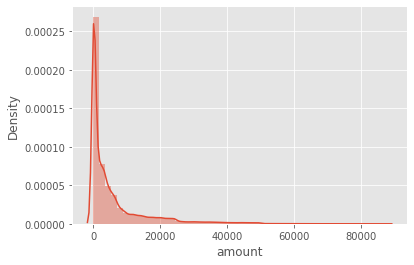

In [ ]:
sns.distplot(trans_df['amount'], bins=50)

The amounts transacted through the account are skewed to the left. This indicates that most of the transactions were less than 10,000.

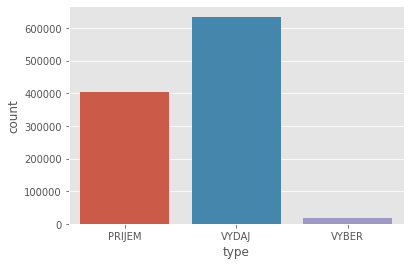

In [ ]:
sns.countplot(x= 'type', data= trans_df)

There are over 600,000 VYDAJ transaction types.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafeaa48790>,
      dtype=object)

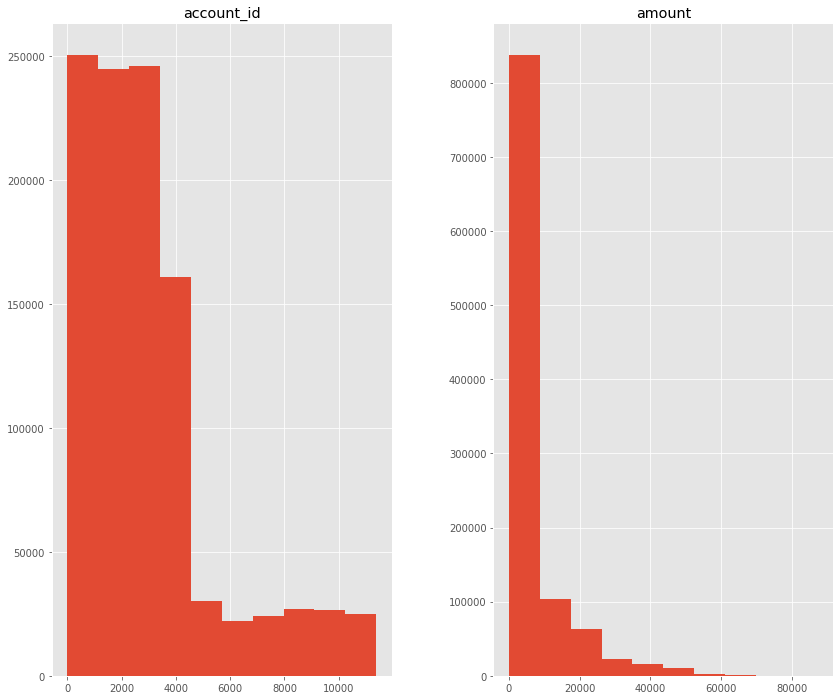

In [ ]:
trans_df.hist(figsize= (14,12))

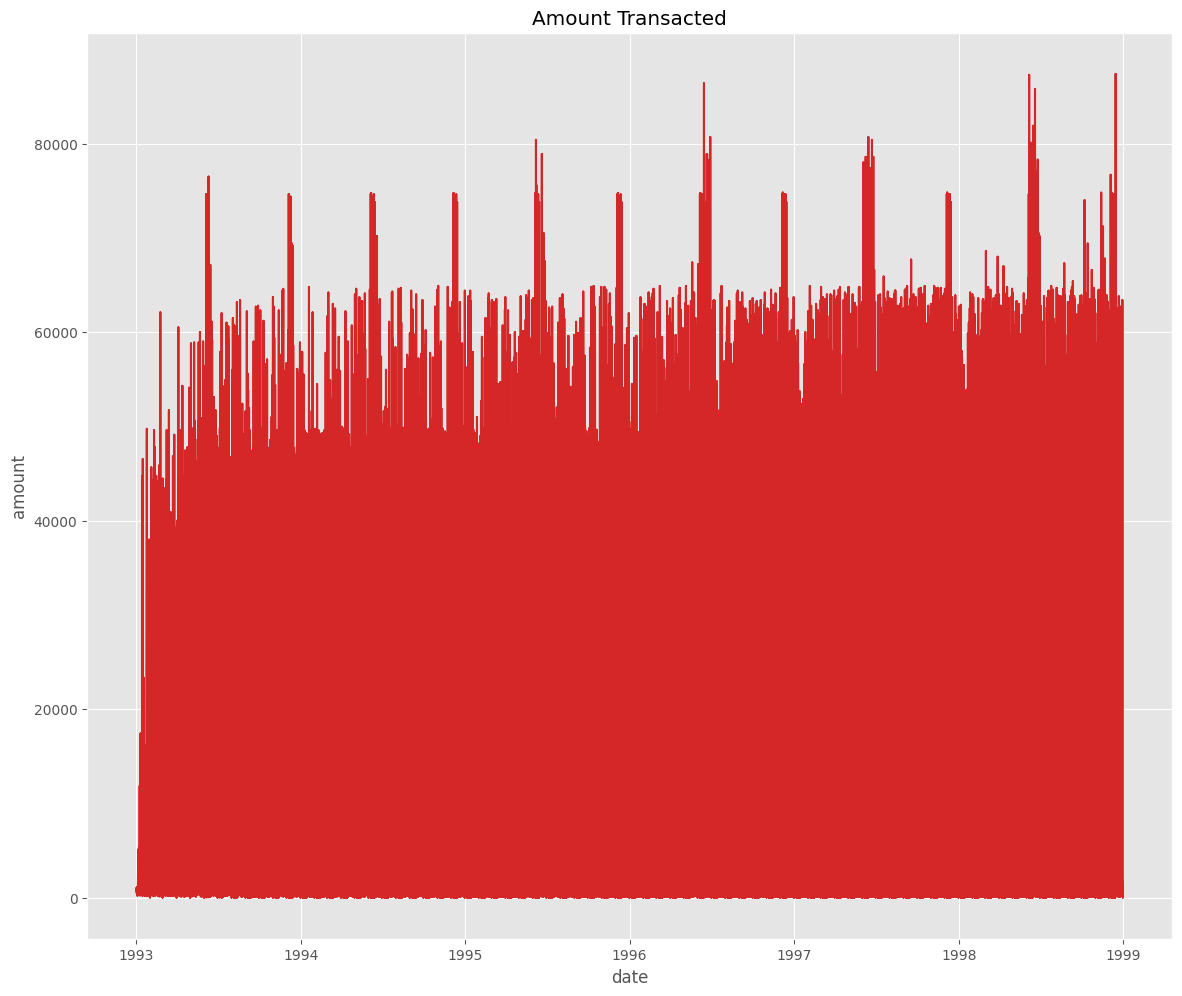

In [ ]:
# Plotting a line chart

def plot_df(df, x, y, xlabel='date', ylabel='amount', title='', dpi= 100):
  plt.figure(figsize= (14,12), dpi=dpi)
  plt.plot(x, y, color= 'tab:red')
  plt.gca().set(title= title, xlabel=xlabel, ylabel=ylabel)
  plt.show()

plot_df(trans_df, x= trans_df.date, y=trans_df.amount, title='Amount Transacted')

In [ ]:
# Renaming the transactions
to_replace = {"PRIJEM":'CREDIT', "VYDAJ":'DEBIT', "VYBER":'UNKNOWN'}
trans_df['type'] = trans_df['type'].replace(to_replace)

In [ ]:
# Filtering to remain with withdrawals only.
debit_df = trans_df.query('type == "DEBIT"').sort_values(by= ['account_id', 'date']).set_index('date')
debit_df.head()

,account_id,type,amount
date,,,
1995-06-22,1,DEBIT,200.0
1995-07-22,1,DEBIT,5300.0
1995-08-21,1,DEBIT,7500.0
1995-08-31,1,DEBIT,14.6
1995-09-05,1,DEBIT,2452.0


### Feature Engineering



1.   sum_5days: the accumulative withdrawal amounts from an account in the previous 5 days (including the current day).
2.   count_5days: the count of withdrawal transactions from an account in the previous 5 days (including the current day).




In [ ]:
# Feature engineering.
# These features will help assist in detecting huge transactions done 
# below the reporting threshold over a period of time.

# Getting the sum of the previous 5 days transaction amounts
debit_df['sum_5days'] = debit_df.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days = 5)).sum())

# get the count of the previous 5 days transactions.
debit_df['count_5days'] = debit_df.groupby('account_id')['amount'].transform(lambda s: s.rolling(timedelta(days=5)).count())

debit_df.head(20)

,account_id,type,amount,sum_5days,count_5days
date,,,,,
1995-06-22,1,DEBIT,200.0,200.0,1.0
1995-07-22,1,DEBIT,5300.0,5300.0,1.0
1995-08-21,1,DEBIT,7500.0,7500.0,1.0
1995-08-31,1,DEBIT,14.6,14.6,1.0
1995-09-05,1,DEBIT,2452.0,2452.0,1.0
1995-09-20,1,DEBIT,700.0,700.0,1.0
1995-09-30,1,DEBIT,14.6,14.6,1.0
1995-10-05,1,DEBIT,2452.0,2452.0,1.0
1995-10-20,1,DEBIT,2900.0,2900.0,1.0


In [ ]:
# Checking for unique values
debit_df.nunique()

account_id      4500
type               1
amount          5786
sum_5days      49169
count_5days       10
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


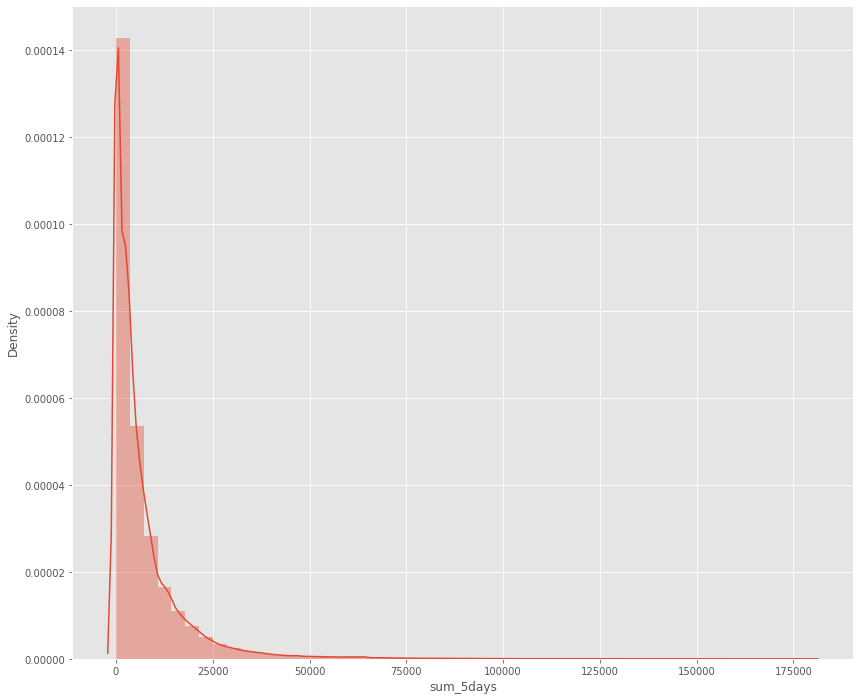

In [ ]:
# Plotting the sum_5days
sns.distplot(debit_df['sum_5days'], bins= 50)

Majority of the accounts are debited with low amounts within 5 days.

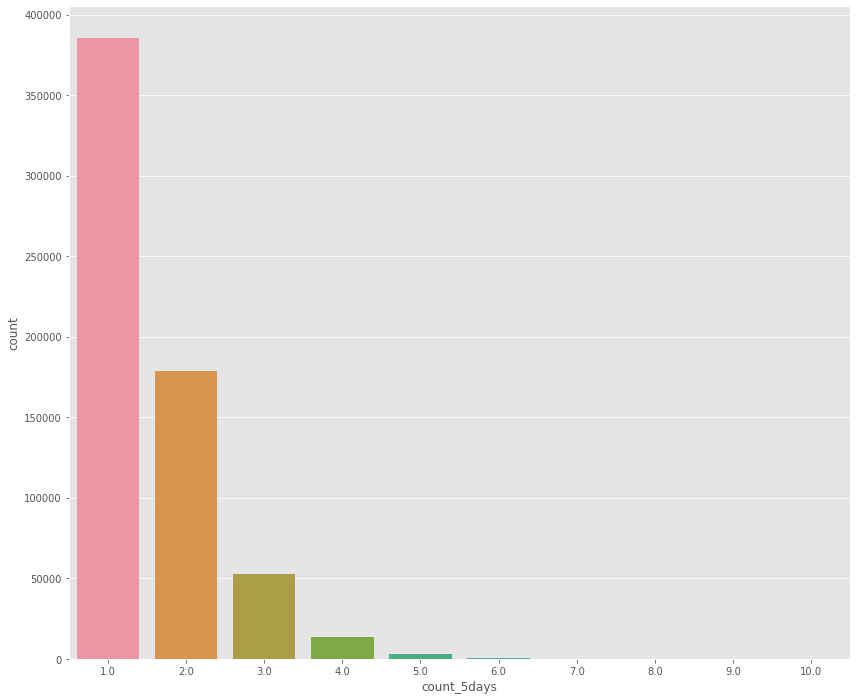

In [ ]:
# Plotting the count of 5 days transactions
sns.countplot(x= 'count_5days', data= debit_df)

Majority of the accounts have less than 4 transacctions within 5 days.

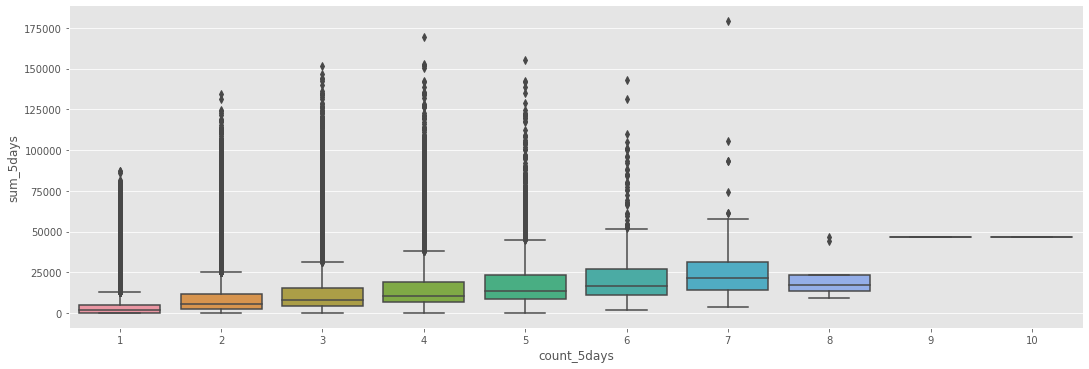

In [ ]:
# Plotting sum_5days against count_5days
sns.catplot(x='count_5days', y= 'sum_5days', data= debit_df, order=[1,2,3,4,5,6,7,8,9,10], kind= 'box', aspect= 3.0)

## Anomaly detection: Isolation Forest

In [ ]:
!pip install pyod

     |████████████████████████████████| 105 kB 26.2 MB/s 
  Created wheel for pyod: filename=pyod-0.9.0-py3-none-any.whl size=122560 sha256=1bdb461ce0e2cfa56203c545a9099b7781104b2be9e0da02d8a3d55f96c8ac97
  Stored in directory: /root/.cache/pip/wheels/42/5f/59/5984a6116a4d19aee28d8ebeffd431364ce1cf21eb73a6ad34
Successfully built pyod


In [ ]:
# Importing Libraries
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

anomaly_proportion = 0.001

# Training IForest indicator
clf_name = 'Anomaly detection - Isolation forest'
clf = IForest(contamination = anomaly_proportion)

X = debit_df[['count_5days', 'sum_5days']]
clf.fit(X)

debit_df['y_pred'] = clf.labels_ #binary labels (0=inlier, 1=outlier)
debit_df['y_scores'] = clf.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly.

Text(0, 0.5, '5-day sum of withdrawal transactions')

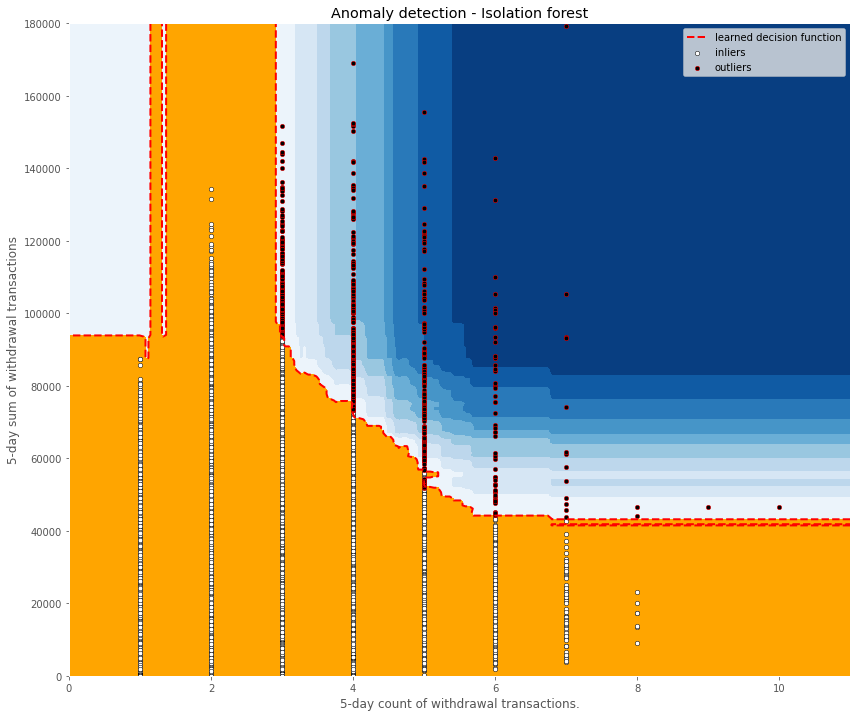

In [ ]:
xx , yy = np.meshgrid(np.linspace(0, 11, 200), np.linspace(0, 180000, 200))

# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)


threshold = (debit_df.loc[debit_df['y_pred'] == 1, 'y_scores'].min()*-1)/2 + (debit_df.loc[debit_df['y_pred'] == 0, 'y_scores'].max()*-1)/2


subplot = plt.subplot(1, 1, 1)

# fill blue colormap from minimum anomaly score to threshold value
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to threshold
a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

msk = debit_df['y_pred'] == 0
x = debit_df.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of inliers with white dots
b = subplot.scatter(x[:, 0], x[:, 1], c='white',s=20, edgecolor='k') 


msk = debit_df['y_pred'] == 1
x = debit_df.loc[msk, ['count_5days', 'sum_5days']].values

# scatter plot of outliers with black dots
c = subplot.scatter(x[:, 0], x[:, 1], c='black',s=20, edgecolor='r')
subplot.axis('tight')



subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'inliers', 'outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right')
subplot.set_title(clf_name)
subplot.set_xlim((0, 11))
subplot.set_ylim((0, 180000))

subplot.set_xlabel("5-day count of withdrawal transactions.")
subplot.set_ylabel("5-day sum of withdrawal transactions")